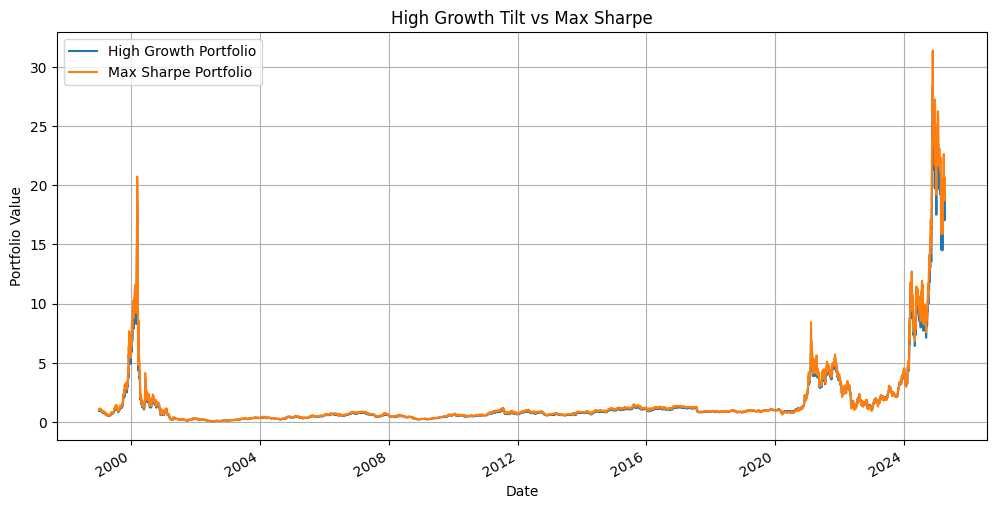

📊 Max Sharpe Performance:
  Cumulative Return: 1845.24%
  Annual Volatility: 74.57%
  Sharpe Ratio:      0.50

📊 High Growth Performance:
  Cumulative Return: 1839.80%
  Annual Volatility: 70.60%
  Sharpe Ratio:      0.48



C:\Users\chris\AppData\Local\Temp\ipykernel_25148\1344062296.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = (values[-1] / values[0]) - 1


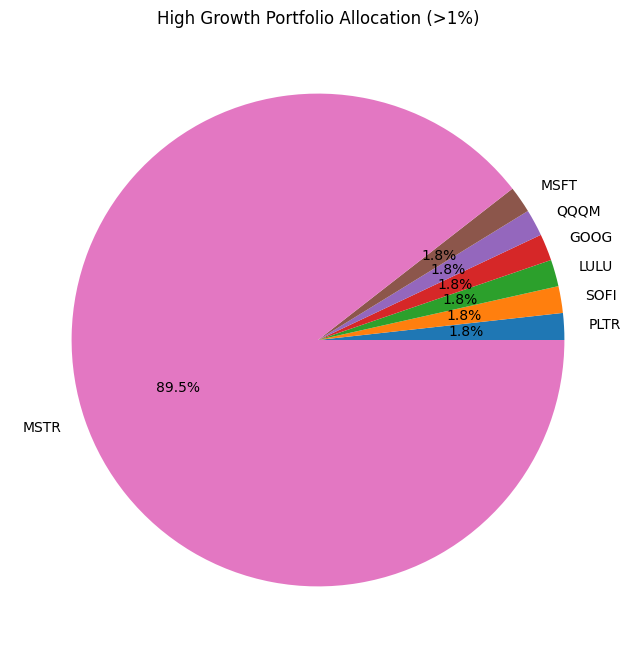

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load price data
prices = pd.read_csv("../data/raw/my_actual_portfolio.csv", index_col=0, parse_dates=True)

# Load max Sharpe weights
sharpe_weights = pd.read_csv("../data/processed/max_sharpe_weights.csv", index_col=0).squeeze("columns")

# Normalize prices
normalized_prices = prices / prices.iloc[0]

high_growth_assets = ["MSTR", "PLTR", "QQQM", "GOOG", "MSFT", "SOFI", "LULU"]
tilt_strength = 0.02  # add 2% to each high-growth asset

# Copy original weights
growth_weights = sharpe_weights.copy()

# Tilt toward high-growth assets
for ticker in high_growth_assets:
    if ticker in growth_weights:
        growth_weights[ticker] += tilt_strength

# Rebalance to sum to 1
growth_weights /= growth_weights.sum()

# Save for comparison
growth_weights.to_csv("../data/processed/high_growth_weights.csv")

# Daily portfolio value
growth_portfolio = normalized_prices.mul(growth_weights, axis=1).sum(axis=1)
original_portfolio = normalized_prices.mul(sharpe_weights, axis=1).sum(axis=1)

plt.figure(figsize=(12, 6))
growth_portfolio.plot(label="High Growth Portfolio")
original_portfolio.plot(label="Max Sharpe Portfolio")
plt.legend()
plt.title("High Growth Tilt vs Max Sharpe")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()

def portfolio_metrics(values, label="Portfolio"):
    returns = values.pct_change().dropna()
    cum_return = (values[-1] / values[0]) - 1
    vol = returns.std() * np.sqrt(252)
    sharpe = (returns.mean() * 252 - 0.02) / (returns.std() * np.sqrt(252))
    print(f"📊 {label} Performance:")
    print(f"  Cumulative Return: {cum_return:.2%}")
    print(f"  Annual Volatility: {vol:.2%}")
    print(f"  Sharpe Ratio:      {sharpe:.2f}\n")

portfolio_metrics(original_portfolio, "Max Sharpe")
portfolio_metrics(growth_portfolio, "High Growth")

growth_weights[growth_weights > 0.01].sort_values().plot.pie(figsize=(8, 8), autopct="%1.1f%%")
plt.title("High Growth Portfolio Allocation (>1%)")
plt.ylabel("")
plt.show()

growth_portfolio.to_csv("../outputs/results/high_growth_portfolio_value.csv")
